In [21]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sb

## 데이터 불러오기

In [3]:
D=pd.read_excel("https://data.hossam.kr/E03/mtcars.xlsx")
data=pd.DataFrame(D)

In [6]:
data.set_index("name",inplace=True)

### 분석 대상 컬럼만 추출

In [19]:
data2=data[data.columns[:-4]]

## 산점도 행렬로 시각화하여 확인하기

In [22]:
plt.rcParams["font.size"]=10
plt.rcParams["figure.figsize"]=(10,6)
plt.rcParams["font.family"]='BM YEONSUNG'
plt.rcParams["axes.unicode_minus"]=False

### 카테고리 타입은 알아서 제외시킴
> 즉 카테고리타입으로 지정하여 시각화할 필요가..

<Figure size 1000x600 with 0 Axes>

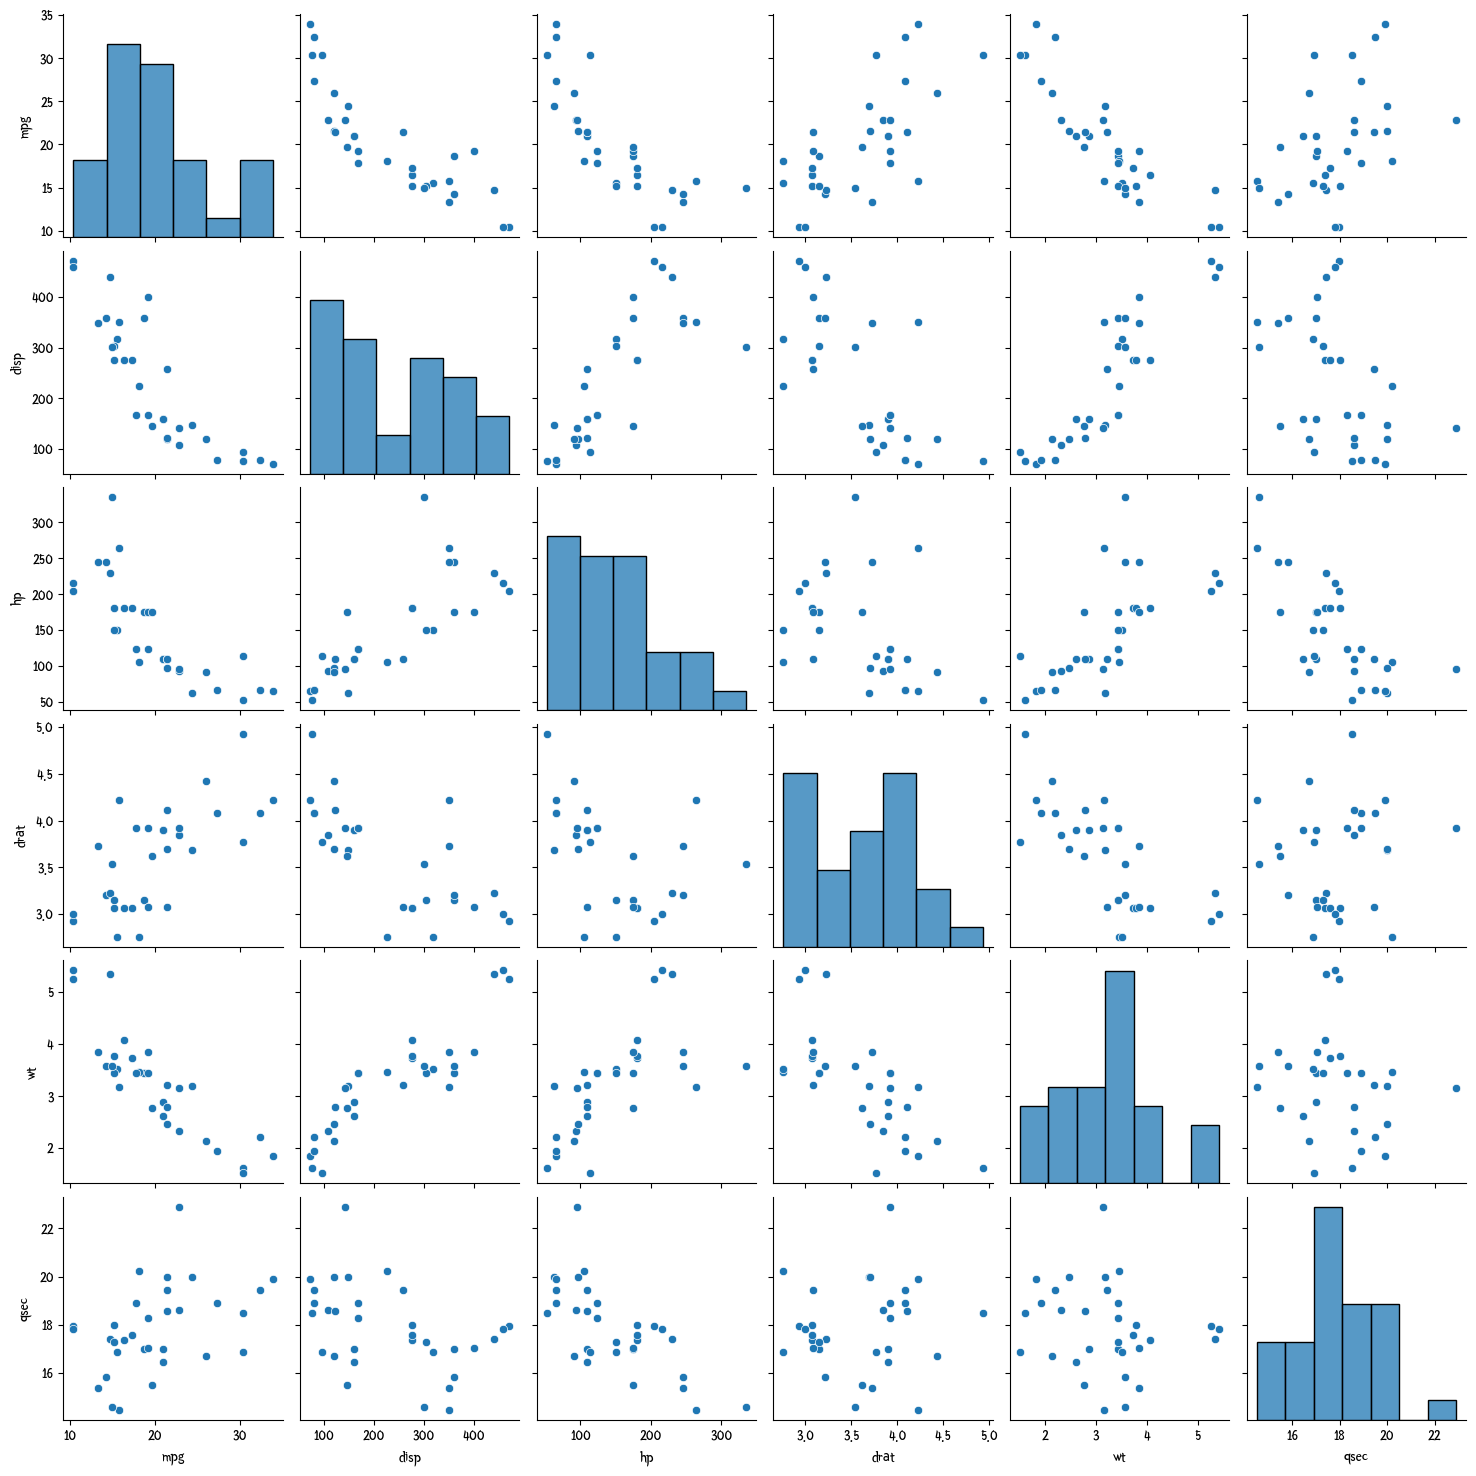

In [45]:
plt.figure()
sb.pairplot(data2)
plt.show()
plt.close()

### 파라미터 설정하기

<Figure size 1000x600 with 0 Axes>

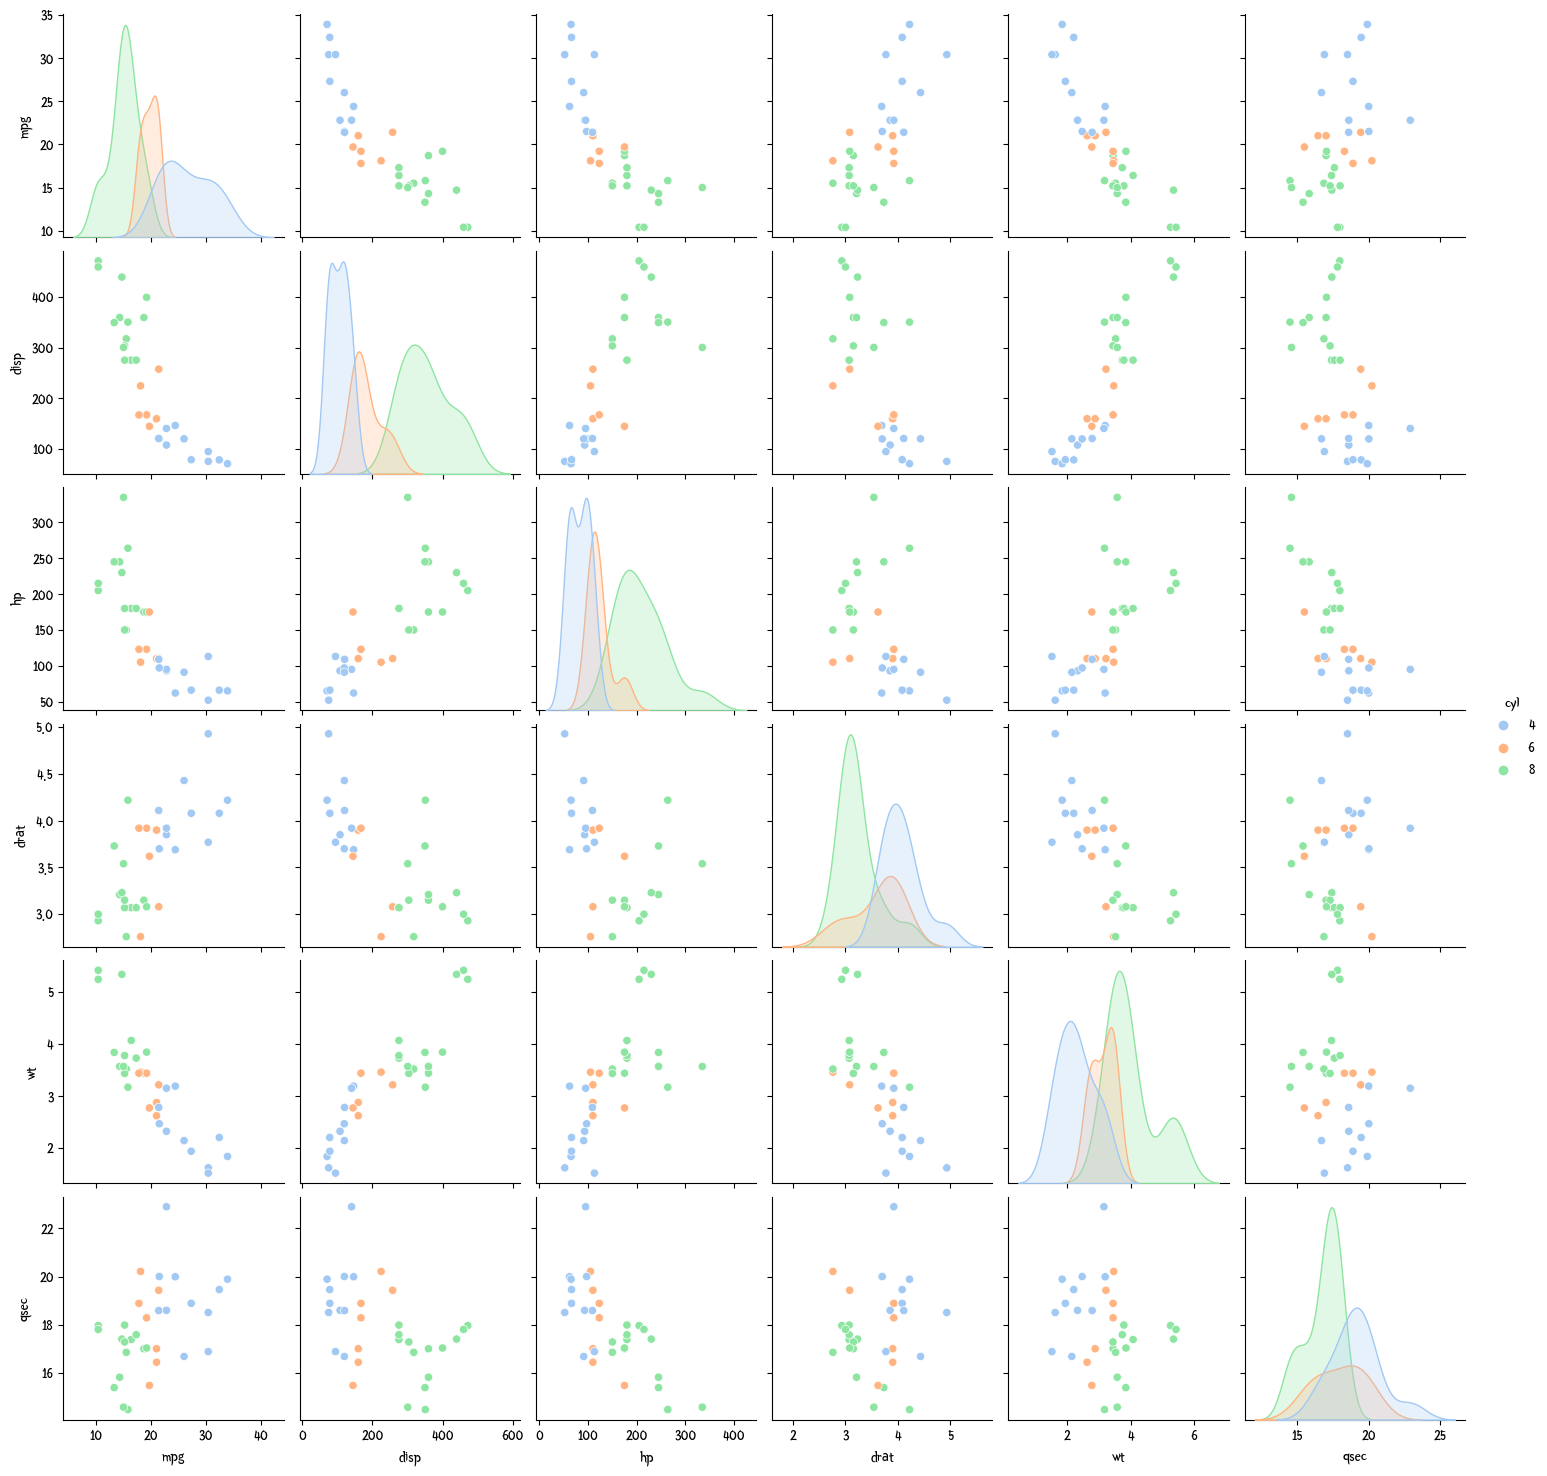

In [48]:
plt.figure()
sb.pairplot(data2,
            diag_kind="kde",
            hue="cyl",
            palette="pastel")
plt.show()
plt.close()

## 대각선 기준을 다르게 표현하기
+ 대각선 위 : 2차원 밀도함수 + 추세선
+ 대각선 아래 : 2차원 밀도함수 + 산포도

<Figure size 1000x600 with 0 Axes>

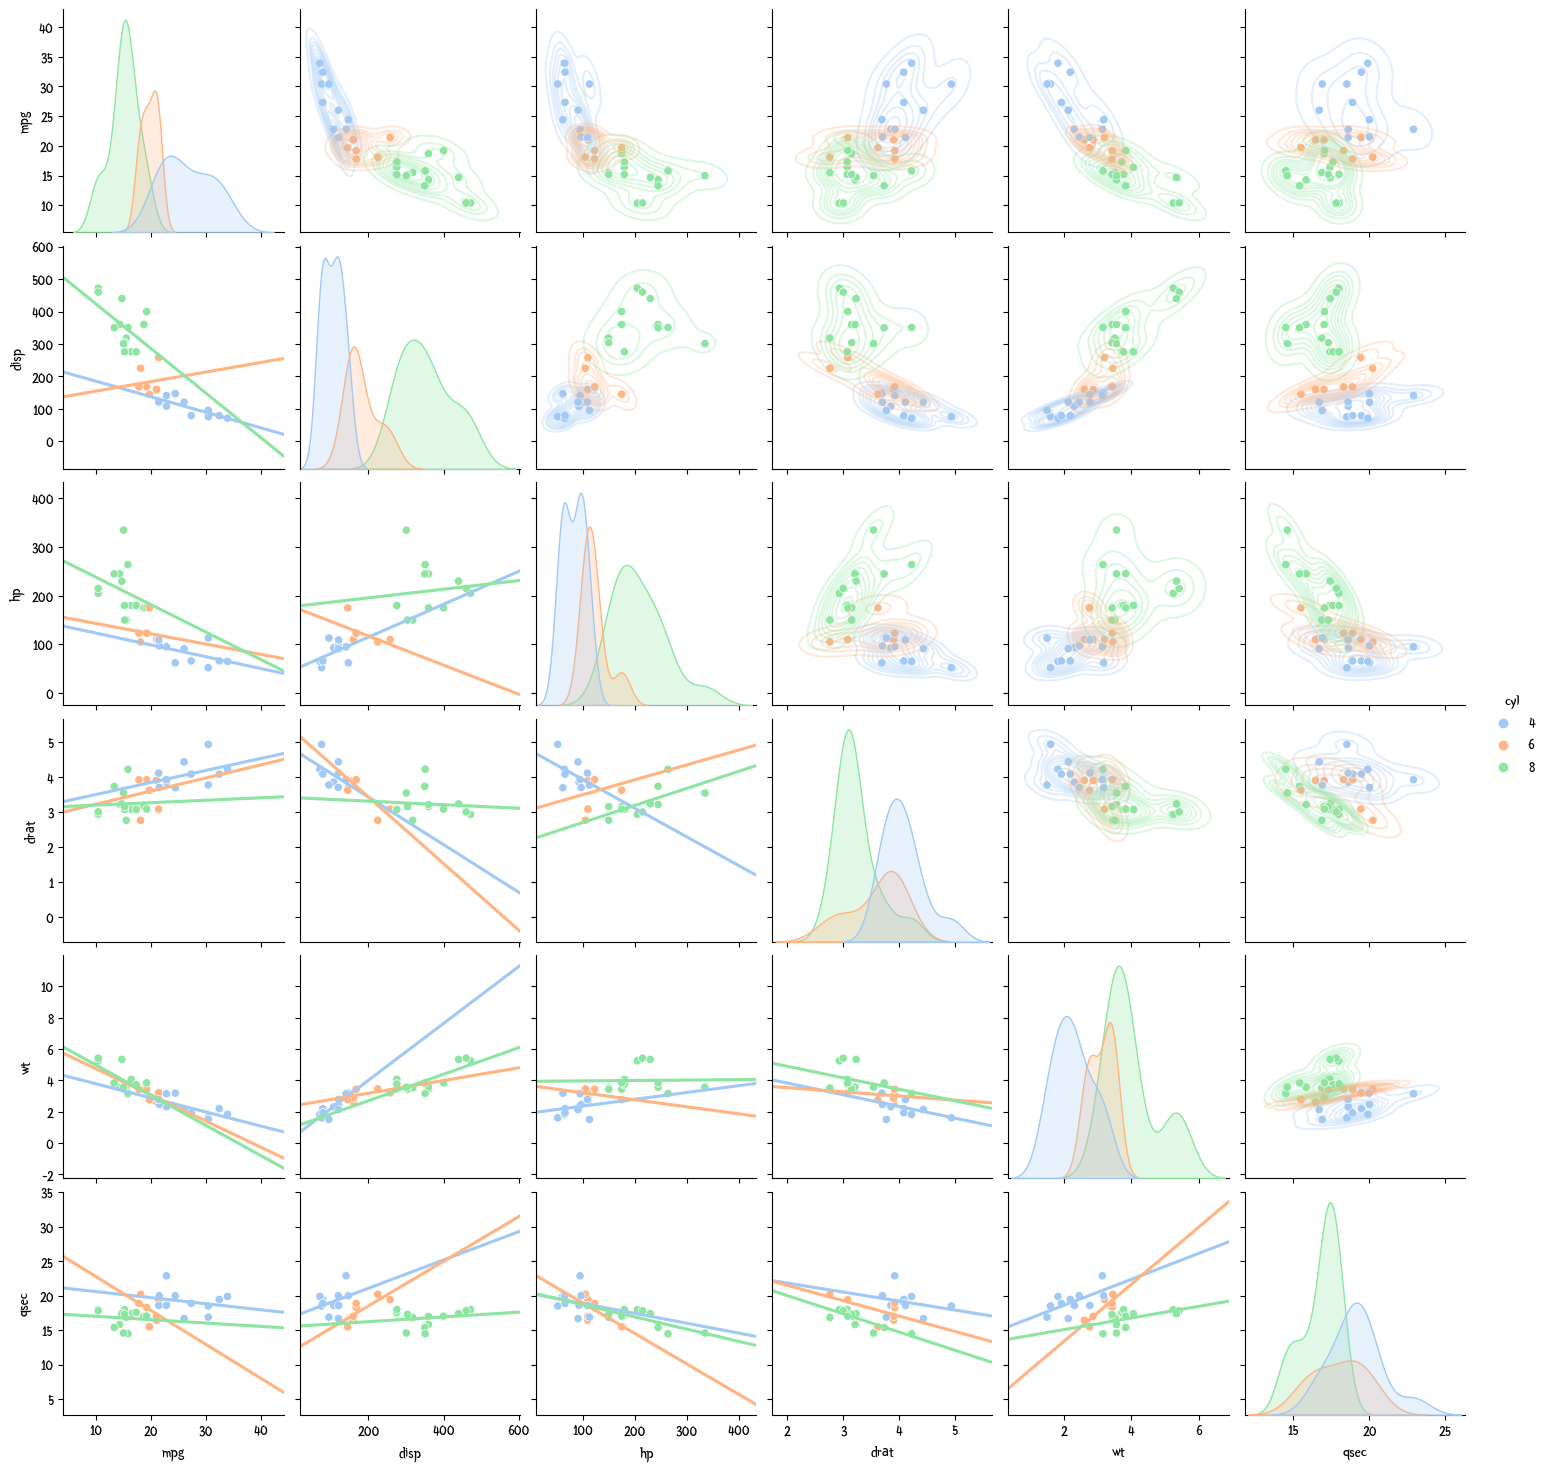

In [50]:
plt.figure()
a=sb.pairplot(data2,
              diag_kind="kde",
              palette="pastel",
              hue="cyl")

a.map_upper(sb.kdeplot,alpha=0.3)
a.map_lower(sb.regplot,scatter=False,truncate=False,ci=False)

plt.show()
plt.close()

## 상관계수 행렬

In [58]:
data3=data2[data2.columns.difference(["cyl"])]
corr=data3.corr(method="pearson")
corr

,disp,drat,hp,mpg,qsec,wt
disp,1.000000,-0.710214,0.790949,-0.847551,-0.433698,0.887980
drat,-0.710214,1.000000,-0.448759,0.681172,0.091205,-0.712441
hp,0.790949,-0.448759,1.000000,-0.776168,-0.708223,0.658748
mpg,-0.847551,0.681172,-0.776168,1.000000,0.418684,-0.867659
qsec,-0.433698,0.091205,-0.708223,0.418684,1.000000,-0.174716
wt,0.887980,-0.712441,0.658748,-0.867659,-0.174716,1.000000


### 시각화

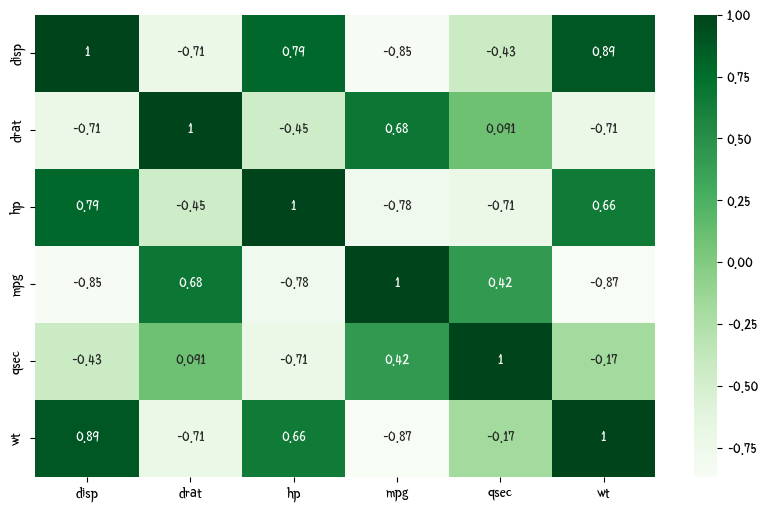

In [74]:
plt.figure()
sb.heatmap(data=corr,annot=True,cmap="Greens")
plt.show()
plt.close()

### 검정(p_value 확인)

In [91]:
cols=[]
for i in range(len(data2.columns)-1):
    for j in range(i+1,len(data2.columns)):
        cols.append((data2.columns[i],data2.columns[j]))

In [96]:
import statsmodels as st
import scipy as sc

In [104]:
result={}
for col in cols:
    t=sc.stats.pearsonr(data2[col[0]],data2[col[1]])
    result[f'{col[0]} & {col[1]}']={"statistic":t[0],"p-value":t[1]}

In [108]:
final=pd.DataFrame(result).T
final["result"]=final["p-value"]<0.05
final["정도"]=abs(final["statistic"])>0.6

In [109]:
final

,statistic,p-value,result,정도
mpg & cyl,-0.852162,6.112687e-10,True,True
mpg & disp,-0.847551,9.380327e-10,True,True
mpg & hp,-0.776168,1.787835e-07,True,True
mpg & drat,0.681172,1.776240e-05,True,True
mpg & wt,-0.867659,1.293959e-10,True,True
mpg & qsec,0.418684,1.708199e-02,True,False
cyl & disp,0.902033,1.802838e-12,True,True
cyl & hp,0.832447,3.477861e-09,True,True
cyl & drat,-0.699938,8.244636e-06,True,True
cyl & wt,0.782496,1.217567e-07,True,True
